In [44]:
## Package for data analysis
import pandas as pd
import numpy as np

## Package for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [45]:
df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

In [46]:
df.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [47]:
df.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,53392.000000,53392.000000,0.0,48346.000000,48346.000000,48346.000000,48346.000000,48346.00000,53392.000000
mean,2013.281465,2013.281465,NaN,31.156681,31.156681,26.892227,35.989997,3889.19286,30.282215
std,1.693300,1.693300,NaN,10.247033,10.247033,10.038584,11.205813,19829.42129,16.821318
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.00000,1.000000
25%,2012.000000,2012.000000,NaN,24.100000,24.100000,20.000000,28.200000,566.00000,17.000000
50%,2013.000000,2013.000000,NaN,30.700000,30.700000,26.450000,35.600000,1209.00000,30.000000
75%,2015.000000,2015.000000,NaN,37.000000,37.000000,32.900000,42.200000,2519.00000,44.000000
max,2016.000000,2016.000000,NaN,77.600000,77.600000,69.500000,87.700000,476876.00000,78.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

##### `Quality`

<AxesSubplot:>

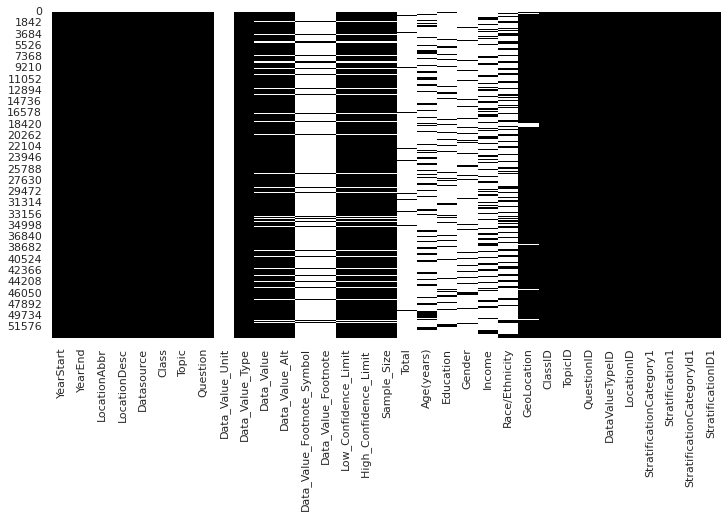

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='gray' )

##### `The columns with most white space are null values and below columns are not required for the analysis. Therefore, removing them.`

In [50]:
df.drop(['Low_Confidence_Limit','High_Confidence_Limit ','YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','ClassID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],1);

/tmp/ipykernel_20281/2311878335.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



##### `Creating separate Dataframes for gender, income and Education`


In [51]:
df2=df[(df['Stratification1']=='Male')|(df['Stratification1']=='Female')]

dfedu=df[df['StratificationCategory1']=='Education']

dfinc=df[df['StratificationCategory1']=='Income']


##### `Reset index for each of new dataframes`


In [52]:
df2 = df2.reset_index(drop = True)
dfedu = dfedu.reset_index(drop = True)
dfinc = dfinc.reset_index(drop = True)

In [53]:
### types of questions asked 

df2['Question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
     

##### `We are interested in questions related to obesity and overweight percentage directly`

In [54]:
X=['Percent of adults aged 18 years and older who have obesity','Percent of adults aged 18 years and older who have an overweight classification']


df3=df2[df2['Question'].apply(lambda x: x in X)]

In [55]:
df3.Question.value_counts()

Percent of adults aged 18 years and older who have obesity                         640
Percent of adults aged 18 years and older who have an overweight classification    640
Name: Question, dtype: int64

##### `We will cover the USA location data. So, separating out the 50 states data removing the locations that are not included within 50 states`

##### survey data covers 2011 - 2014 (all states) or 2016 most states
##### choose 2014 since it has the most data 

In [56]:
df2=df2[df2['YearStart']==2014]


##### separate out national so that we can calculate the national obesity rate for 2014


In [57]:
df2n=df2[(df2['LocationDesc']=='National')]


##### Cut out terriotories that our not included within 50 states + DC data


In [58]:
df2=df2[~(df2['LocationDesc']=='National')]
df2=df2[~(df2['LocationDesc']=='Guam')]
df2=df2[~(df2['LocationDesc']=='Puerto Rico')]
df2['LocationDesc'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'District of Columbia', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nevada', 'Nebraska',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

##### `group data by state and take the mean of men and women rates for each state`


In [59]:
sorted_df = df2.sort_values(['LocationDesc'], ascending = [True])
sorted_df=sorted_df[['LocationAbbr','LocationDesc','Data_Value','Gender']]
sorted_df = sorted_df.groupby('LocationDesc', as_index=False).mean()

##### `calculate the average (over men and women) obesity rate for the country`


In [60]:
natmeanobesity2014=sum(df2n['Data_Value'])/len(df2n)
print(natmeanobesity2014)

29.23333333333333




##### `Let's plot a bar graph of the most and least obese states in the US`
##### `Mark the national average in red`

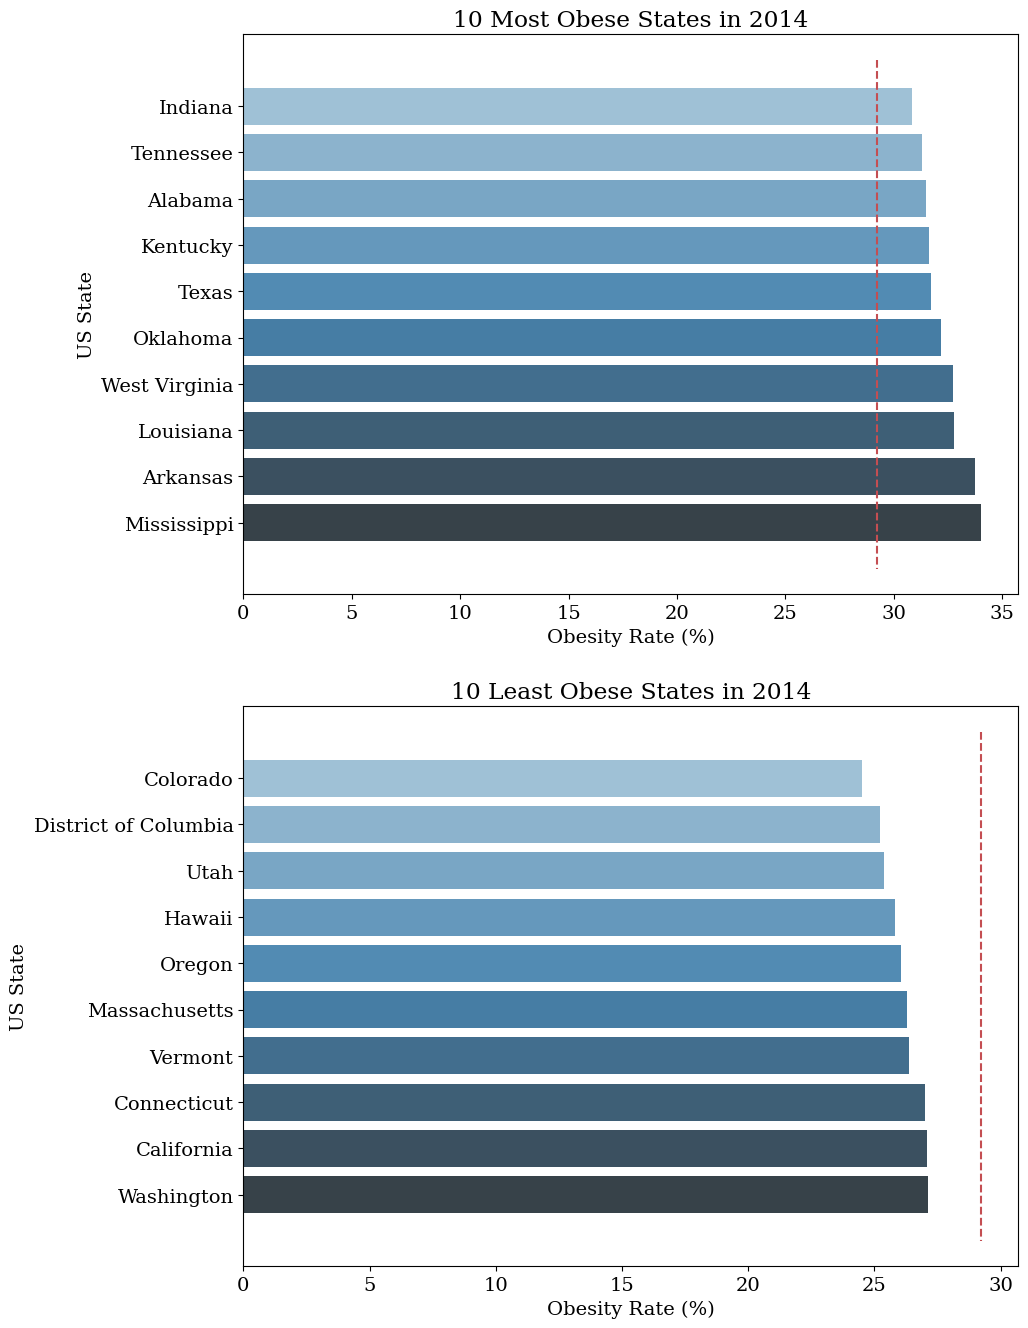

In [82]:
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})

sorted_df = sorted_df.sort_values(['Data_Value'], ascending = [True])

plt.figure(figsize = (10,16))

plt.subplot(2,1,1)
ax=sns.barplot(y=sorted_df.tail(10).LocationDesc,x=sorted_df.tail(10).Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Most Obese States in 2014')

plt.plot([natmeanobesity2014,natmeanobesity2014],[-1,10], '--',color = 'r')

plt.subplot(2,1,2)
ax=sns.barplot(y=sorted_df.head(10).LocationDesc,x=sorted_df.head(10).Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate (%)')
ax.set_title('10 Least Obese States in 2014')

plt.plot([natmeanobesity2014,natmeanobesity2014],[-1,10], '--',color = 'r')

##### `Now, Let's explore if obesity is somehow correlated with educationsl level`

In [62]:
dfedu.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Some college or technical school,EDU,EDUCOTEC
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,College graduate,EDU,EDUCOGRAD
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,VALUE,1,Education,Less than high school,EDU,EDUHS


##### `Just like for the gender one, we need to isolate just the obesity question and the year`

In [63]:
X=['Percent of adults aged 18 years and older who have obesity','Percent of adults aged 18 years and older who have an overweight classification']

#df3=df2[df2['Question'].apply(lambda x: x in X)]
dfedu=dfedu[dfedu['Question']==X[0]]
dfedu=dfedu[dfedu['YearStart']==2014]

#Cut out all locations that aren't within the 50 states + DC
dfedu=dfedu[~(dfedu['LocationDesc']=='National')]
dfedu=dfedu[~(dfedu['LocationDesc']=='Guam')]
dfedu=dfedu[~(dfedu['LocationDesc']=='Puerto Rico')]
dfedu['LocationDesc'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [64]:
#select the four relevant columns to analyze the obesity rate versus educational level

dfedu = dfedu.reset_index(drop = True)
dfedu=dfedu[['YearStart','LocationDesc','Data_Value','Education']]
dfedu.head(10)

,YearStart,LocationDesc,Data_Value,Education
0,2014,Alabama,34.8,Less than high school
1,2014,Alabama,35.4,High school graduate
2,2014,Alabama,34.4,Some college or technical school
3,2014,Alabama,28.1,College graduate
4,2014,Alaska,32.8,Less than high school
5,2014,Alaska,28.3,High school graduate
6,2014,Alaska,34.0,Some college or technical school
7,2014,Alaska,23.4,College graduate
8,2014,Arizona,32.1,Less than high school
9,2014,Arizona,29.8,High school graduate


In [69]:
# Giving each education value a number for easy to understand plot

dfedu['Education'].replace({'Less than high school': 1, 'High school graduate' :2, 'Some college or technical school' : 3, 'College graduate' : 4  }, inplace=True)

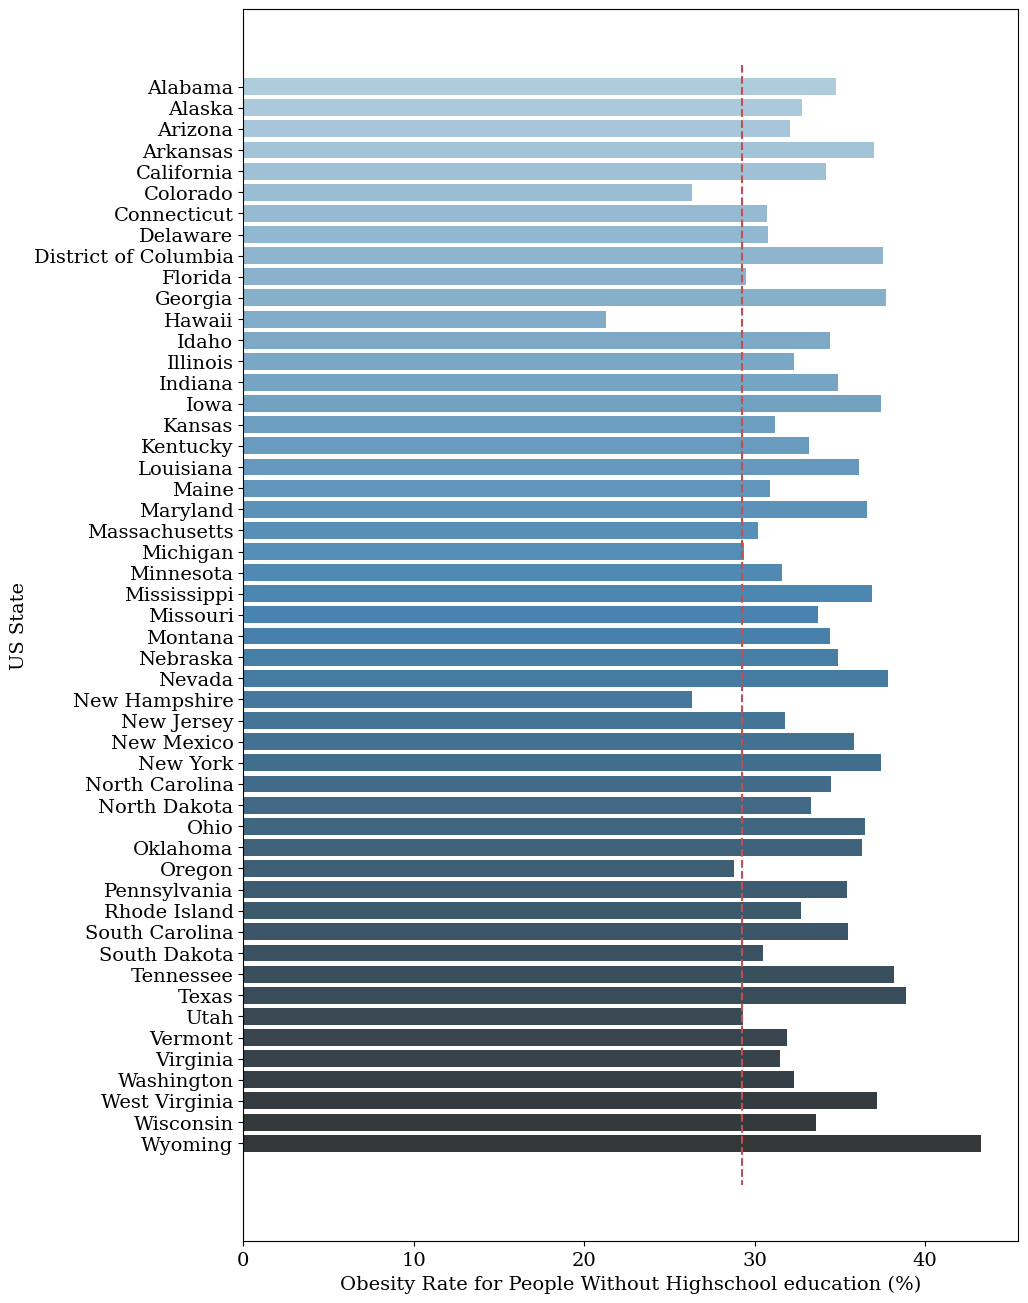

In [87]:
#Let's just take a look at how the obesity varies amongst states for those without highschool
#From the bar graph below, it is clear that Wyomming is an outlier. 

#plt.rc('text', usetex=True)
plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})



## dfeduLHS=dfedu[dfedu[ledu[0]]==1]
dfeduLHS=dfedu[dfedu['Education']==1]
dfeduLHS = dfeduLHS.reset_index(drop = True)

plt.figure(figsize = (10,16))
ax=sns.barplot(y=dfeduLHS.LocationDesc,x=dfeduLHS.Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate for People Without Highschool education (%)')

plt.plot([natmeanobesity2014,natmeanobesity2014],[-1,52], '--',color = 'r') 
plt.show()

In [76]:
dfinc.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [77]:
#Now let's look at the effect income has on obesity

X=['Percent of adults aged 18 years and older who have obesity','Percent of adults aged 18 years and older who have an overweight classification']

#df3=df2[df2['Question'].apply(lambda x: x in X)]
dfinc=dfinc[dfinc['Question']==X[0]]
dfinc=dfinc[dfinc['Question']==X[0]]
dfinc=dfinc[dfinc['YearStart']==2014]
dfinc=dfinc[~(dfinc['LocationDesc']=='National')]
dfinc=dfinc[~(dfinc['LocationDesc']=='Guam')]
dfinc=dfinc[~(dfinc['LocationDesc']=='Puerto Rico')]

dfinc['LocationDesc'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [78]:
dfinc.Income.unique()

array(['Less than $15,000', '$15,000 - $24,999', '$25,000 - $34,999',
       '$35,000 - $49,999', '$50,000 - $74,999', '$75,000 or greater',
       'Data not reported'], dtype=object)

In [79]:
dfinc = dfinc.reset_index(drop = True)
dfinc=dfinc[['YearStart','LocationDesc','Data_Value','Income']]

linc=dfinc.Income.unique()

#Create Dummy Variables from the income
for i in linc:
    dfinc[i]=dfinc['Income'].apply(lambda x: int(x==i))


dfinc=dfinc[~(dfinc.Income=='Data not reported')]

In [80]:
dfinc.head()

,YearStart,LocationDesc,Data_Value,Income,"Less than $15,000","$15,000 - $24,999","$25,000 - $34,999","$35,000 - $49,999","$50,000 - $74,999","$75,000 or greater",Data not reported
0,2014,Alabama,34.5,"Less than $15,000",1,0,0,0,0,0,0
1,2014,Alabama,40.6,"$15,000 - $24,999",0,1,0,0,0,0,0
2,2014,Alabama,35.4,"$25,000 - $34,999",0,0,1,0,0,0,0
3,2014,Alabama,35.5,"$35,000 - $49,999",0,0,0,1,0,0,0
4,2014,Alabama,32.4,"$50,000 - $74,999",0,0,0,0,1,0,0


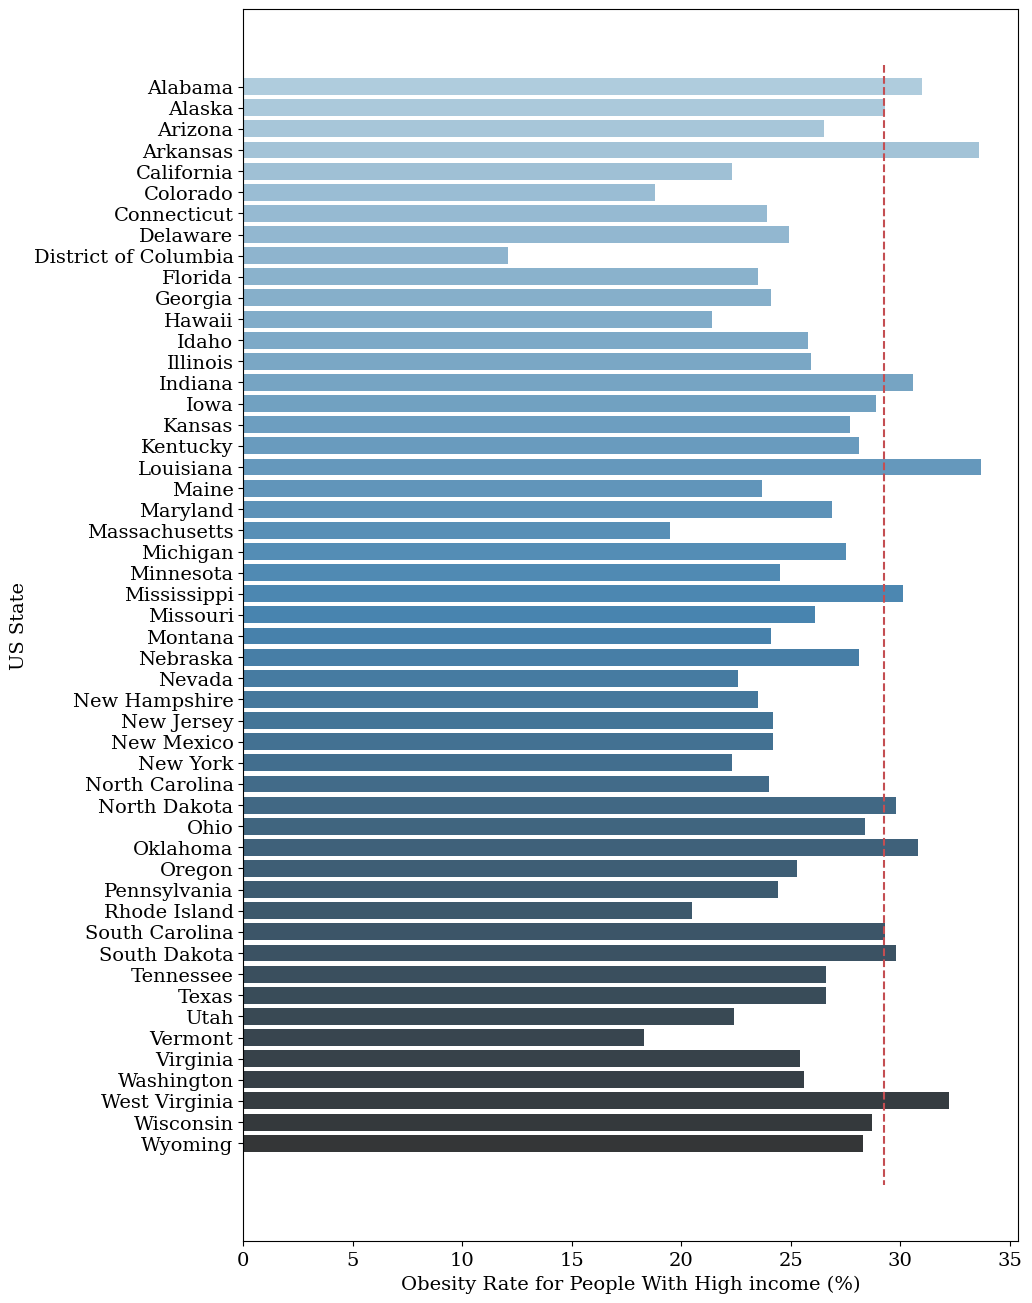

In [88]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})



## dfeduLHS=dfedu[dfedu[ledu[0]]==1]
dfHinc = dfinc[dfinc['$75,000 or greater']==1]
dfHinc = dfHinc.reset_index(drop = True)

plt.figure(figsize = (10,16))
ax=sns.barplot(y=dfHinc.LocationDesc,x=dfHinc.Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate for People With High income (%)')

plt.plot([natmeanobesity2014,natmeanobesity2014],[-1,52], '--',color = 'r') 


plt.show()

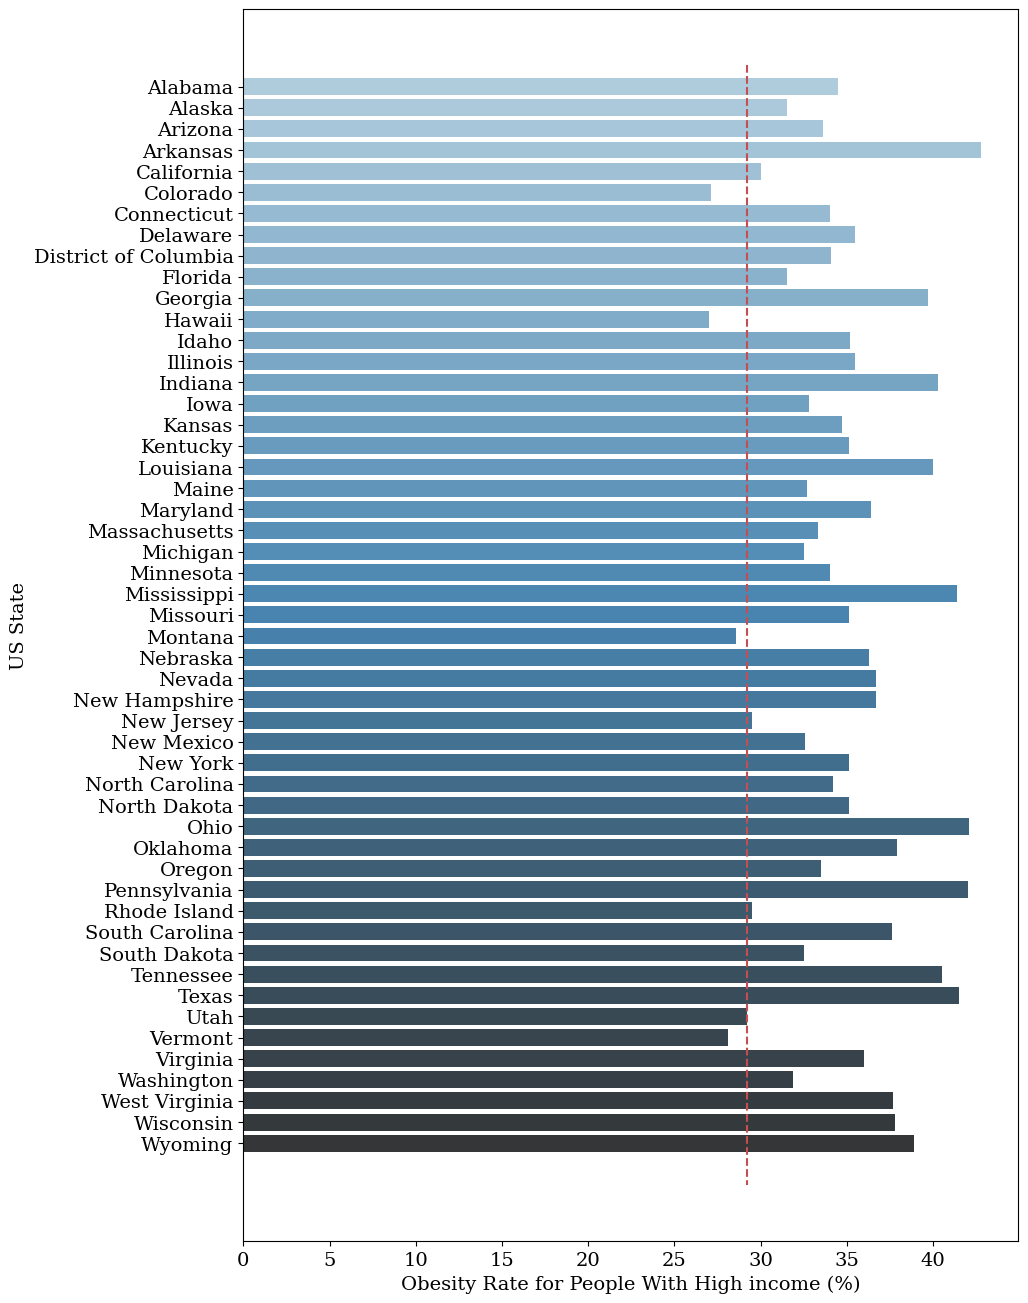

In [90]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 14})



## dfeduLHS=dfedu[dfedu[ledu[0]]==1]
dfHinc = dfinc[dfinc['Less than $15,000']==1]
dfHinc = dfHinc.reset_index(drop = True)

plt.figure(figsize = (10,16))
ax=sns.barplot(y=dfHinc.LocationDesc,x=dfHinc.Data_Value,palette="Blues_d")
ax.set_ylabel('US State')
ax.set_xlabel('Obesity Rate for People With lower than $15,000 income (%)')

plt.plot([natmeanobesity2014,natmeanobesity2014],[-1,52], '--',color = 'r') 


plt.show()

##### `Conclusion`:
1. Education level Less than High school show high impact on obesity rate
2. Income level more than $75,000 shows less impact on obesity rate
3. Income level less than $15,000 show more impact on obesity
